In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Online_Retail.csv', encoding='latin1')

In [81]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Count of Duplicated Values
df.duplicated().sum()


np.int64(5268)

In [ ]:
#Count of Null Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Process of Data Cleaning With Duplicate Values
df_cleaned = df.drop_duplicates()
#Process of Data Cleaning With Null Values
df_cleaned = df_cleaned.dropna(subset = ['CustomerID'])

In [58]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [59]:
df_cleaned.duplicated().sum()

np.int64(0)

In [60]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f'column: {col}')
    print(f'number of unique values: {len(values)}')
    print(f'unique values: {values[:10]}')
    print('-' * 50)

column: InvoiceNo
number of unique values: 25900
unique values: <StringArray>
['536365', '536366', '536367', '536368', '536369', '536370', '536371',
 '536372', '536373', '536374']
Length: 10, dtype: str
--------------------------------------------------
column: StockCode
number of unique values: 4070
unique values: <StringArray>
['85123A',  '71053', '84406B', '84029G', '84029E',  '22752',  '21730',
  '22633',  '22632',  '84879']
Length: 10, dtype: str
--------------------------------------------------
column: Description
number of unique values: 4224
unique values: <StringArray>
[ 'WHITE HANGING HEART T-LIGHT HOLDER',                 'WHITE METAL LANTERN',
      'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE',
      'RED WOOLLY HOTTIE WHITE HEART.',        'SET 7 BABUSHKA NESTING BOXES',
   'GLASS STAR FROSTED T-LIGHT HOLDER',              'HAND WARMER UNION JACK',
           'HAND WARMER RED POLKA DOT',       'ASSORTED COLOUR BIRD ORNAMENT']
Length: 10, dtype: 

In [ ]:
#Data Frame Cleaned without Null or Duplicated Values
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Creation of Column 'TotalPrice'
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [ ]:
#Switching 'InvoiceDate' to datetime Data Type 
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned.head()


C:\Users\icalu\AppData\Local\Temp\ipykernel_26988\942851434.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [64]:
df_cleaned.info()

<class 'pandas.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  str           
 1   StockCode    401604 non-null  str           
 2   Description  401604 non-null  str           
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[us]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  str           
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[us](1), float64(3), int64(1), str(4)
memory usage: 30.6 MB


In [ ]:
#Creating Columns 'year' and 'Month' to Manage Data Easier
df_cleaned['year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [ ]:
#Calculation of Sales by Year
sales_per_year = df_cleaned.groupby('year')['TotalPrice'].sum()
sales_per_year

year
2010     552372.860
2011    7726146.564
Name: TotalPrice, dtype: float64

In [ ]:
#Creation of the Column 'Semester' and Calculation of Sales per Semester
df_cleaned['semester'] = df_cleaned['month'].apply(lambda x:1 if x<=6 else 2)
sales_per_semester = df_cleaned.groupby(['year', 'semester'])['TotalPrice'].sum()
sales_per_semester

year  semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalPrice, dtype: float64

In [ ]:
# Creation of Column 'trimester' and Calculation of Sales per Trimester
df_cleaned['trimester'] = pd.cut(
    df_cleaned['month'],
    bins = [0,3,6,9,12],
    labels = [3,6,9,12]
).astype(int)

sales_per_trimester = df_cleaned.groupby(['year', 'trimester'])['TotalPrice'].sum()
sales_per_trimester


year  trimester
2010  12            552372.860
2011  3            1487842.180
      6            1679096.861
      9            2117546.643
      12           2441660.880
Name: TotalPrice, dtype: float64

In [ ]:
#Calculation of Sales per Trimester
sales_per_month = df_cleaned.groupby(['year', 'month'])['TotalPrice'].sum()
sales_per_month

year  month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalPrice, dtype: float64

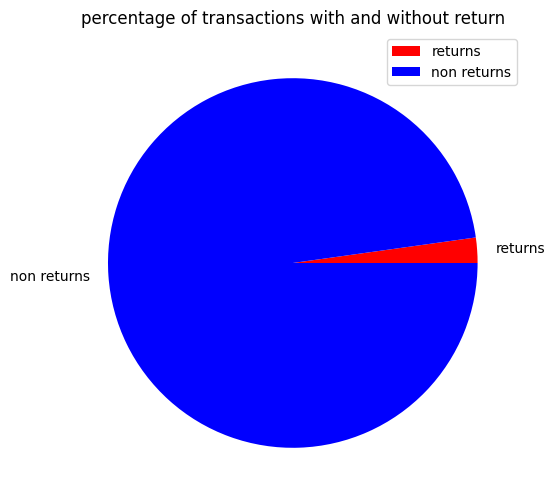

In [92]:
#Count of Sales with Returns
total_returns = df_cleaned[df_cleaned['Quantity']<0].shape[0]
total_returns
#Count of Sales without Returns
total_non_returns= df_cleaned[df_cleaned['Quantity']>=0].shape[0]
total_non_returns
#Creation of Pie Chart
labels = ['returns', 'non returns']
sizes = [total_returns , total_non_returns]
colors= ['red', 'blue']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors = colors, startangle=0)
plt.title('percentage of transactions with and without return')
plt.legend()
plt.show()

In [93]:
#Categorization Based on Transaction Amount
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif 20 <= amount <= 100:
        return 'Medium'
    else:
        return 'High'
#Creation of Column ''AmountCategory'
df_cleaned['AmountCategory'] = df_cleaned['TotalPrice'].apply(categorize_total_amount)

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month,semester,trimester,AmountCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,12,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,12,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,12,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,12,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,12,Medium


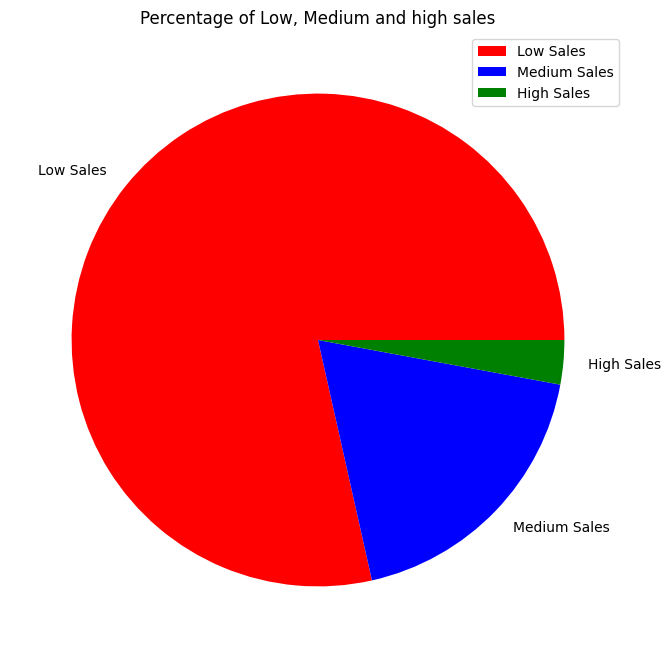

In [94]:
#Pie Chart Based On Low, Medium or High Sales
low_sales = (df_cleaned['AmountCategory'] == 'Low').sum()
medium_sales = (df_cleaned['AmountCategory'] == 'Medium').sum()
high_sales = (df_cleaned['AmountCategory'] == 'High').sum()

labels = ['Low Sales', 'Medium Sales', 'High Sales']
sizes = [low_sales , medium_sales, high_sales]
colors= ['red', 'blue', 'green']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors = colors, startangle=0)
plt.title('Percentage of Low, Medium and high sales')
plt.legend()
plt.show()

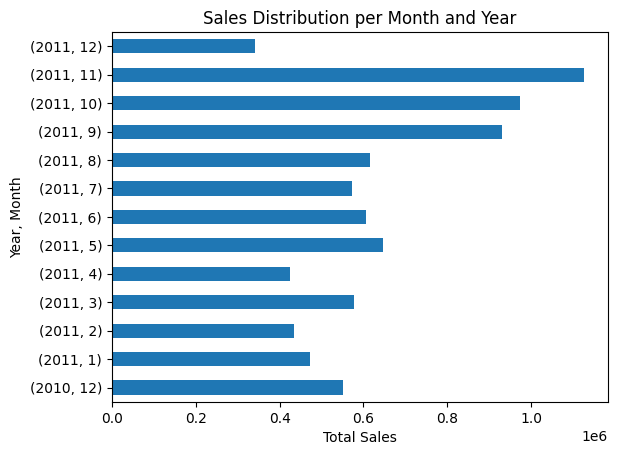

In [80]:
#Bar Chart of Sales Distribution per Month and Year
plt.Figure(figsize=(12,6))
df_cleaned.groupby(['year', 'month'])['TotalPrice'].sum().plot(kind='barh')
plt.title('Sales Distribution per Month and Year')
plt.xlabel('Total Sales')
plt.ylabel('Year, Month')
plt.show()

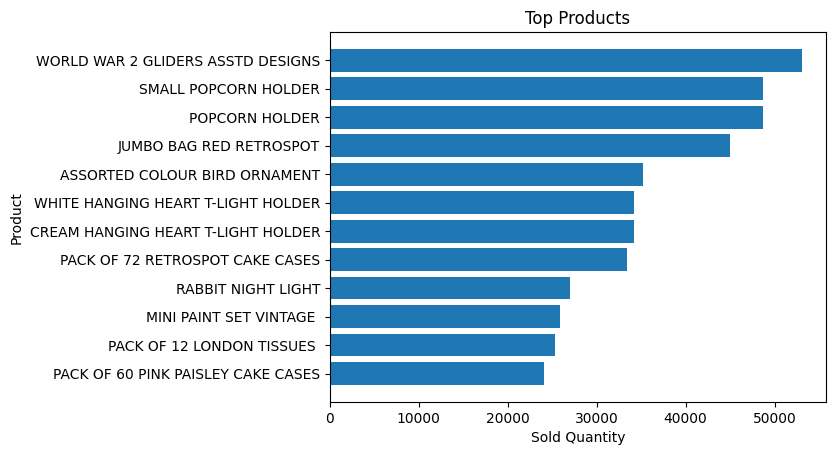

In [ ]:
#Bar Chart of Top Products by Sold Quantity
top_products = df_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, df_cleaned[['StockCode', 'Description']].drop_duplicates(), on = 'StockCode', how='left')

plt.Figure(figsize=(12,8))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top Products')
plt.xlabel('Sold Quantity')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.show()